In [1]:
pwd()
using Pkg; Pkg.activate("../../../FermiCG/")
using FermiCG, NPZ, JLD2
using Plots
using PyCall
using Printf

readdir()

  Activating environment at `~/code/FermiCG/Project.toml`


2-element Vector{String}:
 ".ipynb_checkpoints"
 "ccsd_scan.ipynb"

In [3]:
molecule = "
He         1.66977       -1.66977        0.00000
He         1.66873       -0.00000        0.00000
He         1.66977        1.66977        0.00000
He         0.00000        1.66873        0.00000
He        -1.66977        1.66977       -0.00000
He        -1.66873        0.00000       -0.00000
He        -1.66977       -1.66977       -0.00000
He        -0.00000       -1.66873       -0.00000
"
atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

basis = "aug-cc-pvdz"
# 
# Create FermiCG.Molecule type
mol     = Molecule(0, 1, atoms,basis);


pyscf = pyimport("pyscf")
# pyscf.lib.num_threads(1)


pymol = pyscf.gto.Mole(atom=molecule,
    symmetry = false, spin =0,charge=0,
    basis = basis)

pymol.build()
mf = pyscf.scf.RHF(pymol)
mf.verbose = 4
mf.conv_tol = 1e-8
mf.conv_tol_grad = 1e-5
mf.run(max_cycle=200)

rdm_mf = mf.make_rdm1()

@printf(" Hartree-Fock Energy: %12.8f", mf.e_tot)
pyscfcc = pyimport("pyscf.cc")

mycc = pyscfcc.CCSD(mf).run()
@printf("CCSD total energy    %12.8f\n", mycc.e_tot)
et = mycc.ccsd_t()
@printf("CCSD(T) total energy %12.8f\n", mycc.e_tot + et)




******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-05
SCF max_cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /var/folders/td/qpnnxwv93pq0t7bbdkh5rvzr0000gn/T/tmp0z1j_3_g
max_memory 4000 MB (current use 0 MB)
init E= -22.9740181011428
  HOMO = -0.767719791494068  LUMO = 0.169620364753055
cycle= 1 E= -22.7692598575645  delta_E= 0.205  |g|= 0.0356  |ddm|= 0.528
  HOMO = -0.821705157761209  LUMO = 0.170890143348708
cycle= 2 E= -22.7696329992447  delta_E= -0.000373  |g|= 0.0064  |ddm|= 0.0375
  HOMO = -0.821855003826682  LUMO = 0.170957984554228
cycle= 3 E= -22.7696477690471  delta_E= -1.48e-05  |g|= 0.000298  |ddm|= 0.00871
  HOMO = -0.821813088221593  LUMO = 0.170964268914688
cycle= 4 E= -22.7696478054162  delta_E= -3.64e-08  |g|= 3.43e-05  |ddm|= 0.000479
  HOMO = 

    8

    He       1.7532585000000001      -1.7532585000000001       0.0000000000000000 
    He       1.7521665000000002      -0.0000000000000000       0.0000000000000000 
    He       1.7532585000000001       1.7532585000000001       0.0000000000000000 
    He       0.0000000000000000       1.7521665000000002       0.0000000000000000 
    He      -1.7532585000000001       1.7532585000000001      -0.0000000000000000 
    He      -1.7521665000000002       0.0000000000000000      -0.0000000000000000 
    He      -1.7532585000000001      -1.7532585000000001      -0.0000000000000000 
    He      -0.0000000000000000      -1.7521665000000002      -0.0000000000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-08
SCF max_cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF r

 Hartree-Fock Energy: -22.82814992E(CCSD) = -23.10142971486316  E_corr = -0.2732797937372413
CCSD total energy    -23.10142971
CCSD(T) correction = -0.00019246819404622
CCSD(T) total energy -23.10162218
    8

    He       2.0872125000000001      -2.0872125000000001       0.0000000000000000 
    He       2.0859125000000001      -0.0000000000000000       0.0000000000000000 
    He       2.0872125000000001       2.0872125000000001       0.0000000000000000 
    He       0.0000000000000000       2.0859125000000001       0.0000000000000000 
    He      -2.0872125000000001       2.0872125000000001      -0.0000000000000000 
    He      -2.0859125000000001       0.0000000000000000      -0.0000000000000000 
    He      -2.0872125000000001      -2.0872125000000001      -0.0000000000000000 
    He      -0.0000000000000000      -2.0859125000000001      -0.0000000000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
D

 Hartree-Fock Energy: -22.84174935E(CCSD) = -23.11392302384233  E_corr = -0.2721736719204144
CCSD total energy    -23.11392302
CCSD(T) correction = -9.36116607989725e-05
CCSD(T) total energy -23.11401664
    8

    He       2.4211665000000000      -2.4211665000000000       0.0000000000000000 
    He       2.4196585000000002      -0.0000000000000000       0.0000000000000000 
    He       2.4211665000000000       2.4211665000000000       0.0000000000000000 
    He       0.0000000000000000       2.4196585000000002       0.0000000000000000 
    He      -2.4211665000000000       2.4211665000000000      -0.0000000000000000 
    He      -2.4196585000000002       0.0000000000000000      -0.0000000000000000 
    He      -2.4211665000000000      -2.4211665000000000      -0.0000000000000000 
    He      -0.0000000000000000      -2.4196585000000002      -0.0000000000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84488542E(CCSD) = -23.11643343502567  E_corr = -0.2715480139515617
CCSD total energy    -23.11643344
CCSD(T) correction = -4.508468831563e-05
CCSD(T) total energy -23.11647852
    8

    He       2.7551204999999999      -2.7551204999999999       0.0000000000000000 
    He       2.7534044999999998      -0.0000000000000000       0.0000000000000000 
    He       2.7551204999999999       2.7551204999999999       0.0000000000000000 
    He       0.0000000000000000       2.7534044999999998       0.0000000000000000 
    He      -2.7551204999999999       2.7551204999999999      -0.0000000000000000 
    He      -2.7534044999999998       0.0000000000000000      -0.0000000000000000 
    He      -2.7551204999999999      -2.7551204999999999      -0.0000000000000000 
    He      -0.0000000000000000      -2.7534044999999998      -0.0000000000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DI

 Hartree-Fock Energy: -22.84556431E(CCSD) = -23.11675373218835  E_corr = -0.271189426966759
CCSD total energy    -23.11675373
CCSD(T) correction = -2.23377640577309e-05
CCSD(T) total energy -23.11677607
    8

    He       3.0890745000000002      -3.0890745000000002       0.0000000000000000 
    He       3.0871505000000004      -0.0000000000000000       0.0000000000000000 
    He       3.0890745000000002       3.0890745000000002       0.0000000000000000 
    He       0.0000000000000000       3.0871505000000004       0.0000000000000000 
    He      -3.0890745000000002       3.0890745000000002      -0.0000000000000000 
    He      -3.0871505000000004       0.0000000000000000      -0.0000000000000000 
    He      -3.0890745000000002      -3.0890745000000002      -0.0000000000000000 
    He      -0.0000000000000000      -3.0871505000000004      -0.0000000000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
D

 Hartree-Fock Energy: -22.84565168E(CCSD) = -23.11664861964005  E_corr = -0.2709969377717395
CCSD total energy    -23.11664862
CCSD(T) correction = -1.1676513952491e-05
CCSD(T) total energy -23.11666030
    8

    He       3.4230284999999996      -3.4230284999999996       0.0000000000000000 
    He       3.4208965000000000      -0.0000000000000000       0.0000000000000000 
    He       3.4230284999999996       3.4230284999999996       0.0000000000000000 
    He       0.0000000000000000       3.4208965000000000       0.0000000000000000 
    He      -3.4230284999999996       3.4230284999999996      -0.0000000000000000 
    He      -3.4208965000000000       0.0000000000000000      -0.0000000000000000 
    He      -3.4230284999999996      -3.4230284999999996      -0.0000000000000000 
    He      -0.0000000000000000      -3.4208965000000000      -0.0000000000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
D

 Hartree-Fock Energy: -22.84564651E(CCSD) = -23.11654123966447  E_corr = -0.2708947255316755
CCSD total energy    -23.11654124
CCSD(T) correction = -6.484338099903e-06
CCSD(T) total energy -23.11654772
    8

    He       3.7569824999999999      -3.7569824999999999       0.0000000000000000 
    He       3.7546425000000001      -0.0000000000000000       0.0000000000000000 
    He       3.7569824999999999       3.7569824999999999       0.0000000000000000 
    He       0.0000000000000000       3.7546425000000001       0.0000000000000000 
    He      -3.7569824999999999       3.7569824999999999      -0.0000000000000000 
    He      -3.7546425000000001       0.0000000000000000      -0.0000000000000000 
    He      -3.7569824999999999      -3.7569824999999999      -0.0000000000000000 
    He      -0.0000000000000000      -3.7546425000000001      -0.0000000000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DI

 Hartree-Fock Energy: -22.84564154E(CCSD) = -23.11647859949033  E_corr = -0.27083706100631
CCSD total energy    -23.11647860
CCSD(T) correction = -3.80523513116537e-06
CCSD(T) total energy -23.11648240
    8

    He       4.0909365000000006      -4.0909365000000006       0.0000000000000000 
    He       4.0883885000000006      -0.0000000000000000       0.0000000000000000 
    He       4.0909365000000006       4.0909365000000006       0.0000000000000000 
    He       0.0000000000000000       4.0883885000000006       0.0000000000000000 
    He      -4.0909365000000006       4.0909365000000006      -0.0000000000000000 
    He      -4.0883885000000006       0.0000000000000000      -0.0000000000000000 
    He      -4.0909365000000006      -4.0909365000000006      -0.0000000000000000 
    He      -0.0000000000000000      -4.0883885000000006      -0.0000000000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DI

 Hartree-Fock Energy: -22.84563928E(CCSD) = -23.1164422926856  E_corr = -0.2708030161301152
CCSD total energy    -23.11644229
CCSD(T) correction = -2.33870296085774e-06
CCSD(T) total energy -23.11644463
    8

    He       4.4248905000000009      -4.4248905000000009       0.0000000000000000 
    He       4.4221345000000003      -0.0000000000000000       0.0000000000000000 
    He       4.4248905000000009       4.4248905000000009       0.0000000000000000 
    He       0.0000000000000000       4.4221345000000003       0.0000000000000000 
    He      -4.4248905000000009       4.4248905000000009      -0.0000000000000000 
    He      -4.4221345000000003       0.0000000000000000      -0.0000000000000000 
    He      -4.4248905000000009      -4.4248905000000009      -0.0000000000000000 
    He      -0.0000000000000000      -4.4221345000000003      -0.0000000000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
D

 Hartree-Fock Energy: -22.84563812E(CCSD) = -23.11642085497035  E_corr = -0.2707827367659212
CCSD total energy    -23.11642085
CCSD(T) correction = -1.49348725032653e-06
CCSD(T) total energy -23.11642235
    8

    He       4.7588445000000004      -4.7588445000000004       0.0000000000000000 
    He       4.7558805000000000      -0.0000000000000000       0.0000000000000000 
    He       4.7588445000000004       4.7588445000000004       0.0000000000000000 
    He       0.0000000000000000       4.7558805000000000       0.0000000000000000 
    He      -4.7588445000000004       4.7588445000000004      -0.0000000000000000 
    He      -4.7558805000000000       0.0000000000000000      -0.0000000000000000 
    He      -4.7588445000000004      -4.7588445000000004      -0.0000000000000000 
    He      -0.0000000000000000      -4.7558805000000000      -0.0000000000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84563770E(CCSD) = -23.11640835533784  E_corr = -0.2707706509465224
CCSD total energy    -23.11640836
CCSD(T) correction = -9.84981132251904e-07
CCSD(T) total energy -23.11640934


┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1342


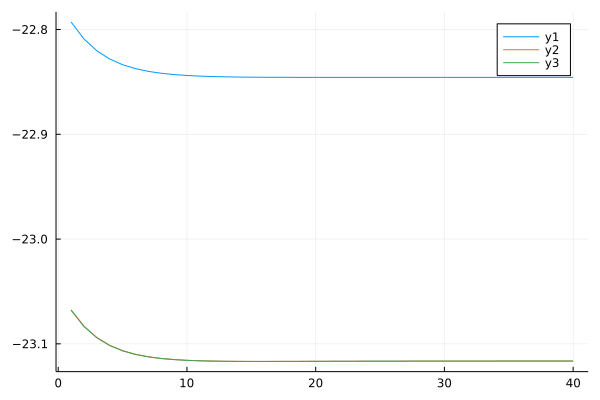

In [4]:
n_steps = 40
step_size = .05

pymol_init = pyscf.gto.Mole(atom=molecule,
    symmetry = false, spin =0,charge=0,
    basis = basis)
pymol.build()


io = open("traj.xyz", "w");
energies_scf = []
energies_ccsd = []
energies_ccsdt = []

for R in 1:n_steps

    pymol = deepcopy(pymol_init)
    scale = 1+R*step_size

    xyz = @sprintf("%5i\n\n", length(mol.atoms))
    tmp = []
    for a in mol.atoms
        push!(tmp, ["He", (a.xyz[1]*scale, a.xyz[2]*scale, a.xyz[3]*scale)])
        xyz = xyz * @sprintf("%6s %24.16f %24.16f %24.16f \n", a.symbol, a.xyz[1]*scale, a.xyz[2]*scale, a.xyz[3]*scale)
    end
    pymol.atom = tmp
    pymol.build()
    
    
    println(xyz)
    write(io, xyz);
   
    
#     println(pymol.format_atom(1))
    
    #     mol_R = Molecule(0, 1, [a[0]pymol.atom, pymol.basis)


    mf = pyscf.scf.RHF(pymol)
    mf.verbose = 4
    mf.conv_tol = 1e-8
    mf.conv_tol_grad = 1e-8
    mf.run(max_cycle=200)

    rdm_mf = mf.make_rdm1()
    @printf(" Hartree-Fock Energy: %12.8f", mf.e_tot)

    push!(energies_scf, mf.e_tot)
    
    pyscfcc = pyimport("pyscf.cc")

    mycc = pyscfcc.CCSD(mf).run()
    @printf("CCSD total energy    %12.8f\n", mycc.e_tot)
    
    et = mycc.ccsd_t()
    @printf("CCSD(T) total energy %12.8f\n", mycc.e_tot + et)

    
    push!(energies_ccsd, mycc.e_tot)
    push!(energies_ccsdt, mycc.e_tot+et)

end
close(io);
plot([energies_scf, energies_ccsd, energies_ccsdt])

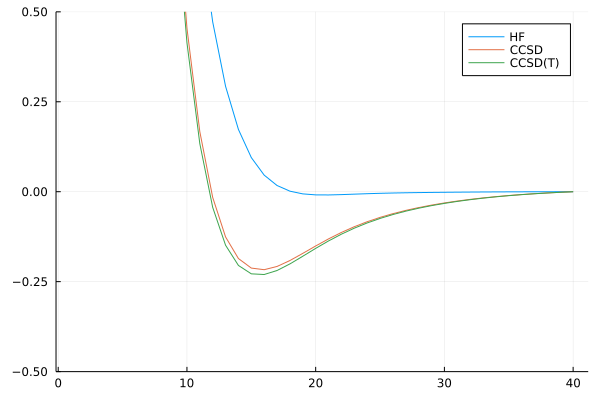

In [5]:
plot([energies_scf.-energies_scf[end], energies_ccsd.-energies_ccsd[end], energies_ccsdt.-energies_ccsdt[end]]*627.51, 
labels = ["HF" "CCSD" "CCSD(T)"])
ylims!((-.5,.5))